In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [2]:
# draw decision boundary of classification model
# it only accepts 2-d inputs with sparse labels rather than one-hot encoding
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, shading='nearest', cmap=plt.cm.Paired)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.yticks()

In [4]:
dataset = load_iris()
data = dataset['data']
X = data[:, :2]
y = dataset['target']
y.shape

(150,)

In [5]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [10]:
model.coef_ # weight

array([[-2.70890249,  2.32402378],
       [ 0.61273259, -1.57058803],
       [ 2.0961699 , -0.75343574]])

In [11]:
model.intercept_ # bias

array([ 7.91322129,  1.84504714, -9.75826843])

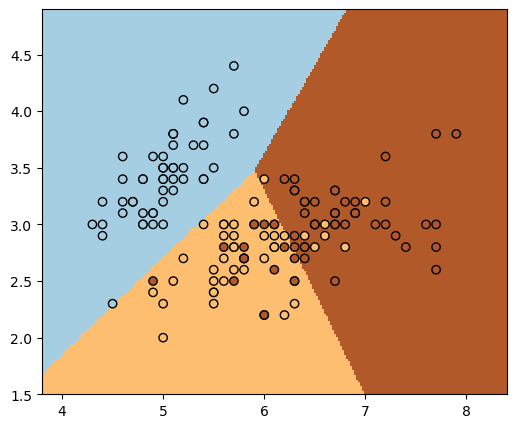

In [9]:
plt.figure(figsize=(6, 5))
plot_decision_boundary(model, X, y)
plt.show()

# Cost Function
- Loss Function 이라고도 함.
- `예측값과 정답의 차의 제곱`의 평균

<br>

- Linear Regression에서 Cost Function의 값을 최소화할 수 있다면 최적의 직선을 찾을 수 있음

- 예를 들어, Cost Function이 $38\theta^2-94\theta+62$일 때, Cost Function의 최솟값을 미분해서 찾을 수 있음

In [4]:
# !pip install sympy

In [2]:
import sympy as sym

In [5]:
th = sym.Symbol('th')
diff_th = sym.diff(38*th**2 - 94*th + 62, th) # cost function 미분
diff_th

76*th - 94

- 실제로는 cost function이 매우 복잡해서 손으로 풀기 어려움

# Cost Function 최솟값 구하기

경사하강법($J_{\theta}(x)$ = cost function)
$$\theta - \alpha\frac{d}{dt}J_{\theta}(x)$$


- $\alpha$ - `learning rate`
- learning rate 가 클수록 최솟값을 찾으로 가는 간격이 크게 됨. 

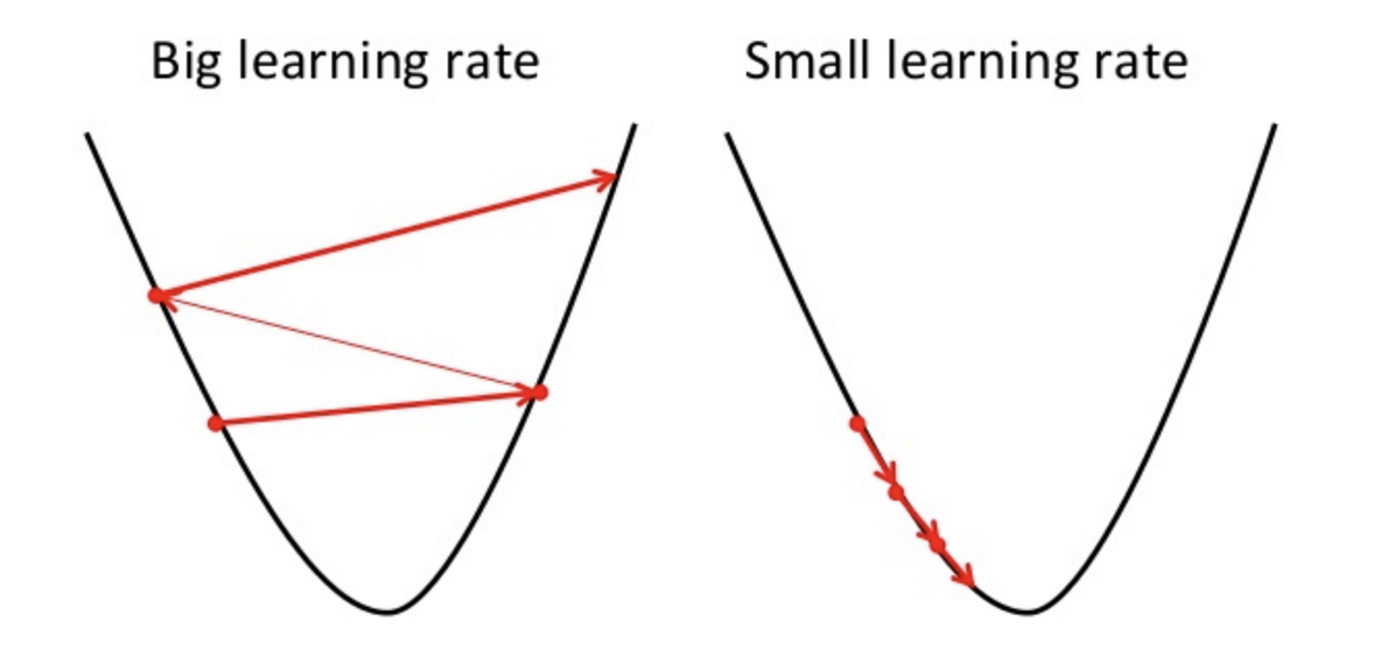

- 경사하강법(Gradient descent)를 `optimizer`라고 부름

# 회귀를 분류에 적용할 수 있을까? - Logistic Function

In [1]:
import numpy as np

In [4]:
z = np.arange(-10, 10, 0.01)
g = 1/(1+np.exp(-z))

In [2]:
import matplotlib.pyplot as plt

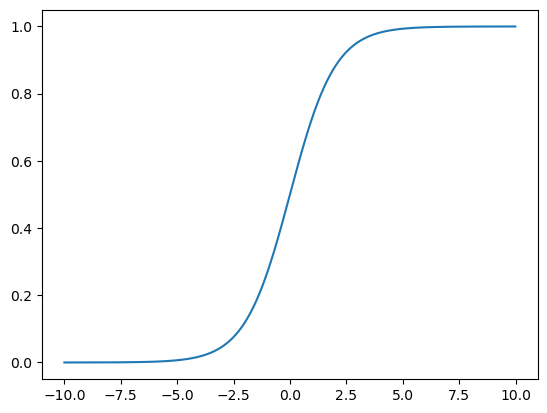

In [5]:
plt.plot(z, g)